In [10]:
import os
from sqlalchemy import create_engine
import pandas as pd
from bs4 import BeautifulSoup
import requests




In [11]:
url = "https://api.scrapingdog.com/scrape?api_key=657d00937d4a6d76113ecd1c&url=https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue&dynamic=false"

response = requests.get(url)

print(response.status_code)

200


In [12]:
if response:
    soup = BeautifulSoup(response.content, 'html.parser')
    print(soup)


<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
<title>Tesla Revenue 2010-2023 | TSLA | MacroTrends</title>
<link href="/assets/images/icons/FAVICON/macrotrends-favicon.ico" rel="icon" type="image/x-icon"/>
<meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2023. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&

In [13]:

# Find all tables
tables = soup.find_all('table')

# Select the second table
# Note: Python uses 0-based indexing, so the second table is at index 1
second_table = tables[1]

# Initialize a list to store your data
data = []

# Iterate over the rows in the table
for row in second_table.find_all('tr'):
    columns = row.find_all('td')
    if columns:  # This checks if there are any columns in the current row
        data.append([col.text.strip() for col in columns])

# Create a DataFrame from the extracted data
df = pd.DataFrame(data)

# Assuming the first row of data is headers, set them as DataFrame column names
if not df.empty:
    df.columns = df.iloc[0]  # Set the first row as the column names
    df = df[1:]  # Remove the first row from the data

print(df)


0   2023-09-30  $23,350
1   2023-06-30  $24,927
2   2023-03-31  $23,329
3   2022-12-31  $24,318
4   2022-09-30  $21,454
5   2022-06-30  $16,934
6   2022-03-31  $18,756
7   2021-12-31  $17,719
8   2021-09-30  $13,757
9   2021-06-30  $11,958
10  2021-03-31  $10,389
11  2020-12-31  $10,744
12  2020-09-30   $8,771
13  2020-06-30   $6,036
14  2020-03-31   $5,985
15  2019-12-31   $7,384
16  2019-09-30   $6,303
17  2019-06-30   $6,350
18  2019-03-31   $4,541
19  2018-12-31   $7,226
20  2018-09-30   $6,824
21  2018-06-30   $4,002
22  2018-03-31   $3,409
23  2017-12-31   $3,288
24  2017-09-30   $2,985
25  2017-06-30   $2,790
26  2017-03-31   $2,696
27  2016-12-31   $2,285
28  2016-09-30   $2,298
29  2016-06-30   $1,270
30  2016-03-31   $1,147
31  2015-12-31   $1,214
32  2015-09-30     $937
33  2015-06-30     $955
34  2015-03-31     $940
35  2014-12-31     $957
36  2014-09-30     $852
37  2014-06-30     $769
38  2014-03-31     $621
39  2013-12-31     $615
40  2013-09-30     $431
41  2013-06-30  

In [14]:
df[df.columns[1]] = df[df.columns[1]].replace('[\$,]', '', regex=True)
df[df.columns[1]] = pd.to_numeric(df[df.columns[1]], errors='coerce')
df.dropna(subset=[df.columns[1]], inplace=True)
df

,2023-09-30,"$23,350"
1,2023-06-30,24927.0
2,2023-03-31,23329.0
3,2022-12-31,24318.0
4,2022-09-30,21454.0
5,2022-06-30,16934.0
6,2022-03-31,18756.0
7,2021-12-31,17719.0
8,2021-09-30,13757.0
9,2021-06-30,11958.0
10,2021-03-31,10389.0


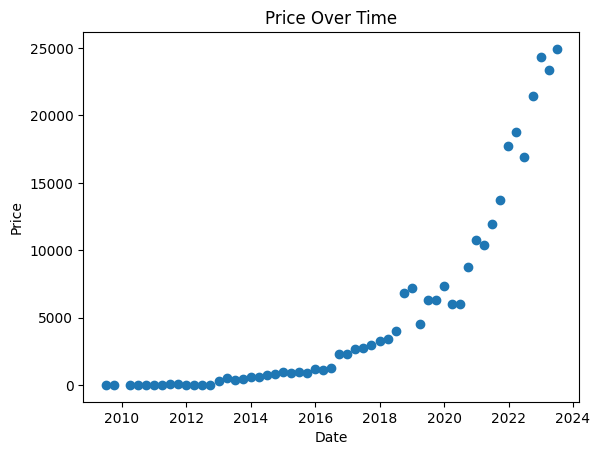

In [15]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Add column labels
df.columns = ['Date', 'Price']

# Follow the previous steps to clean and plot the data

# Step 1: Data Consistency
# Remove dollar signs and commas, then convert to float
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)

# Step 2: Parse Dates
# Convert to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Step 3: Create a Scatter Plot
plt.scatter(df['Date'], df['Price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Over Time')
plt.show()


In [16]:
import sqlite3

# Assuming df is your DataFrame and it's already prepared

# Step 1: Create a SQLite Database Connection
# This will create a new database file named 'my_database.db'
conn = sqlite3.connect('my_database.db')

# Step 2: Create a Table
# The table structure should match the DataFrame structure
# Let's assume your DataFrame has 'Date' and 'Price' columns
create_table_query = """
CREATE TABLE IF NOT EXISTS financial_data (
    Date TEXT,
    Price REAL
)
"""
conn.execute(create_table_query)

# Step 3: Insert DataFrame Values
# Insert the DataFrame into the SQLite table
df.to_sql('financial_data', conn, if_exists='replace', index=False)

# Step 4: Commit Changes and Close Connection
conn.commit()
conn.close()


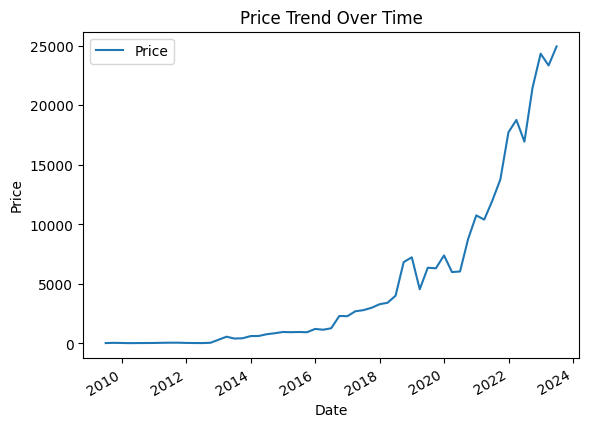

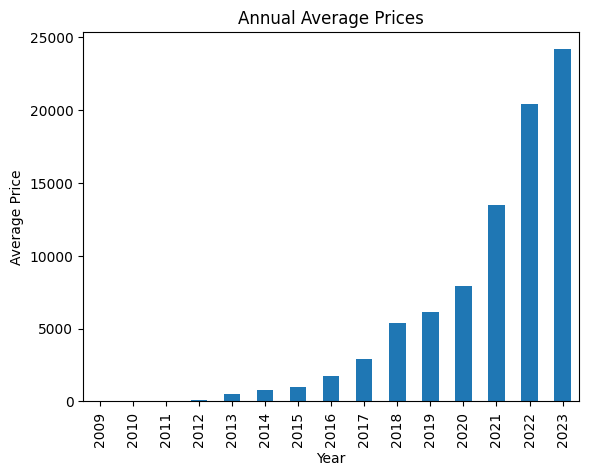

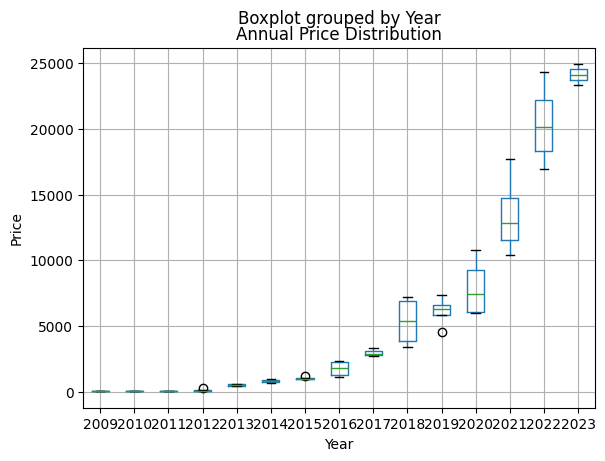

In [17]:


# Connect to SQLite database
conn = sqlite3.connect('my_database.db')

# Extract data from database into a DataFrame
query = "SELECT * FROM financial_data"
df = pd.read_sql_query(query, conn)

# Ensure Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Close the connection
conn.close()

# Visualization 1: Time Series Plot
df.plot(x='Date', y='Price', kind='line')
plt.title('Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Visualization 2: Bar Chart (example: annual average prices)
df['Year'] = df['Date'].dt.year
annual_avg = df.groupby('Year')['Price'].mean()
annual_avg.plot(kind='bar')
plt.title('Annual Average Prices')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

# Visualization 3: Box Plot (example: prices distribution per year)
df.boxplot(column='Price', by='Year')
plt.title('Annual Price Distribution')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()
